In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
NVDA = pd.read_csv("/content/drive/MyDrive/NVIDIA.csv")
NVDA.head()

,Date,Adj Close
0,17-07-2019,4.218399
1,18-07-2019,4.230082
2,19-07-2019,4.186831
3,22-07-2019,4.258418
4,23-07-2019,4.366294


In [ ]:
NVDA.shape

(1258, 2)

In [ ]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Adj Close  1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [ ]:
NVDA.describe()

,Adj Close
count,1258.000000
mean,26.988728
std,25.969410
min,3.697903
25%,12.588618
50%,17.790028
75%,30.133295
max,135.580002


In [ ]:
NVDA.isnull().sum()

Date         0
Adj Close    0
dtype: int64

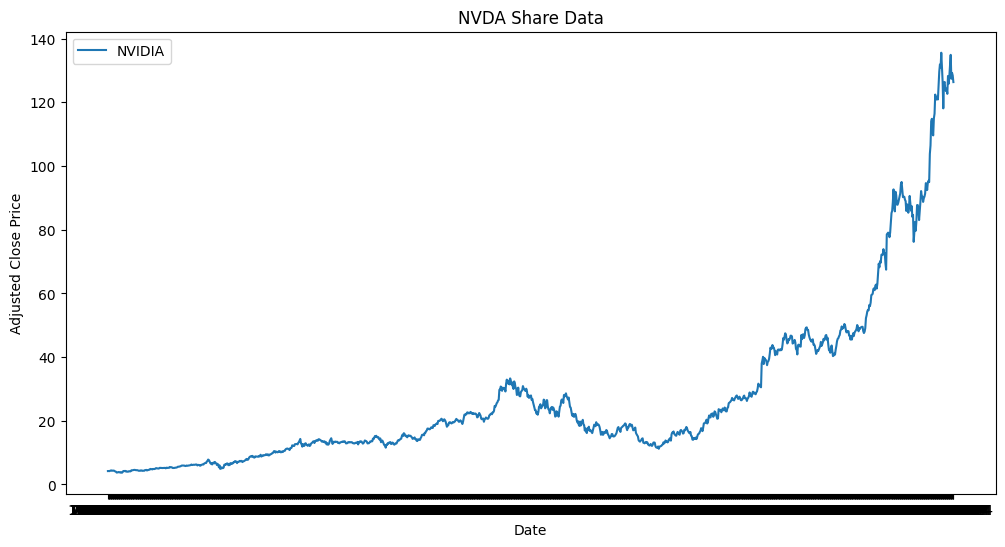

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(NVDA['Date'], NVDA['Adj Close'], label='NVIDIA')  # Plot specific columns
plt.title('NVDA Share Data')
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Adjusted Close Price')  # Label the y-axis
plt.legend()
plt.show()

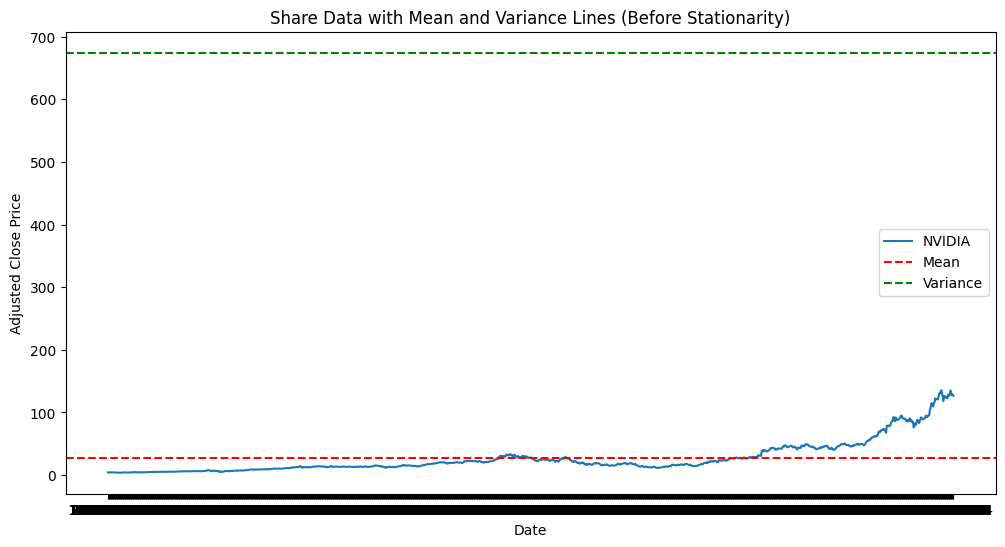

In [ ]:
# Plot mean and variance lines before stationarity
plt.figure(figsize=(12, 6))
plt.plot(NVDA['Date'], NVDA['Adj Close'], label='NVIDIA')  # Plot specific columns for x and y
plt.axhline(y=NVDA['Adj Close'].mean(), color='r', linestyle='--', label='Mean')  # Calculate mean for 'Adj Close'
plt.axhline(y=NVDA['Adj Close'].var(), color='g', linestyle='--', label='Variance')  # Calculate variance for 'Adj Close'
plt.title('Share Data with Mean and Variance Lines (Before Stationarity)')
plt.xlabel('Date')  # Label x-axis
plt.ylabel('Adjusted Close Price')  # Label y-axis
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    # Extract the numerical 'Adj Close' column for the test
    result = adfuller(timeseries['Adj Close'], autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Compare the ADF Statistic and p-value to critical valuesp
    if result[1] < 0.05:
        print("Conclusion: Reject the null hypothesis")
        print("The data is not stationary.")
    else:
        print("Conclusion: Fail to reject the null hypothesis")
        print("The data is stationary.")

# Perform Augmented Dickey-Fuller test on the 'Adj Close' column
print("Original Data:")
adf_test(NVDA)

Original Data:
ADF Statistic: 3.0638651252845697
p-value: 1.0
Critical Values: {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}
Conclusion: Fail to reject the null hypothesis
The data is stationary.


In [ ]:
NVDA_dff = NVDA['Adj Close'].diff().dropna()
NVDA_dff

1       0.011683
2      -0.043251
3       0.071587
4       0.107876
5       0.074571
          ...   
1253    3.529999
1254   -7.510002
1255    1.840003
1256   -0.800003
1257   -2.080001
Name: Adj Close, Length: 1257, dtype: float64

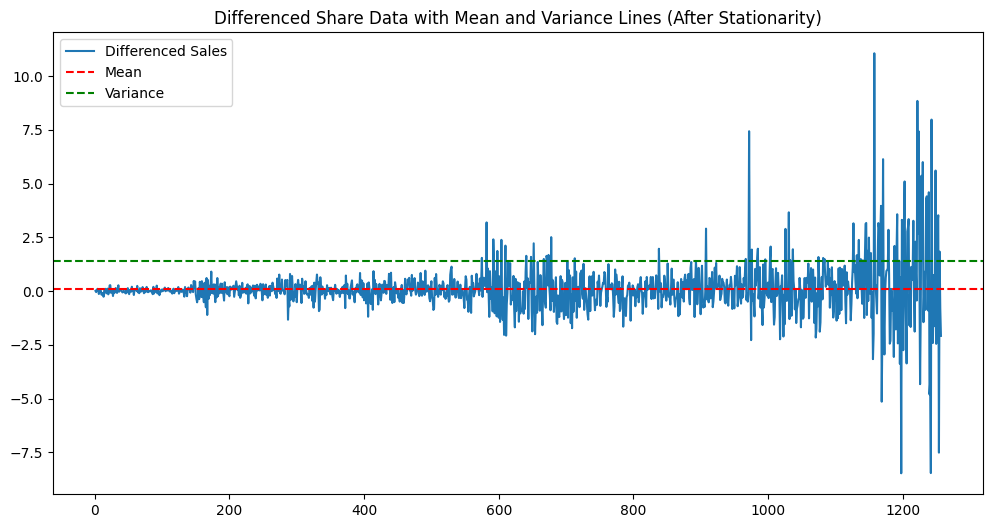

In [ ]:
# Plot mean and variance lines after stationarity
plt.figure(figsize=(12, 6))
plt.plot(NVDA_dff, label='Differenced Sales')
plt.axhline(y=NVDA_dff.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=NVDA_dff.var(), color='g', linestyle='--', label='Variance')
plt.title('Differenced Share Data with Mean and Variance Lines (After Stationarity)')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    # The differenced series doesn't have a column name, so access it directly
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Compare the ADF Statistic and p-value to critical values
    if result[1] < 0.05:
        print("Conclusion: Reject the null hypothesis")
        print("The data is not stationary.")
    else:
        print("Conclusion: Fail to reject the null hypothesis")
        print("The data is stationary.")

# Perform Augmented Dickey-Fuller test on the differenced series
print("\nAfter Differencing:")
adf_test(NVDA_dff)


After Differencing:
ADF Statistic: -6.3104626002960575
p-value: 3.244165002052221e-08
Critical Values: {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}
Conclusion: Reject the null hypothesis
The data is not stationary.


Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

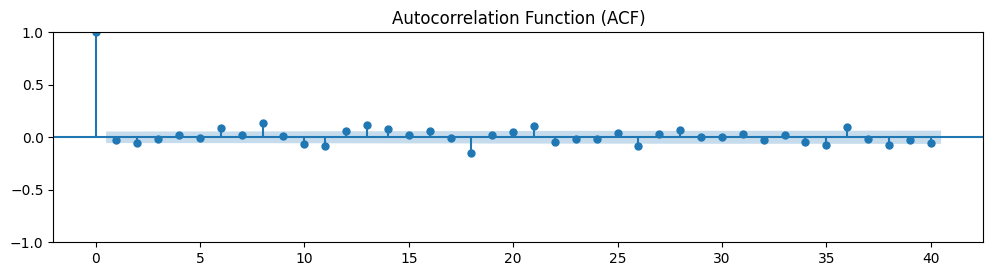

In [ ]:
# Plot ACF and PACF to determine order of p and q
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(NVDA_dff, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

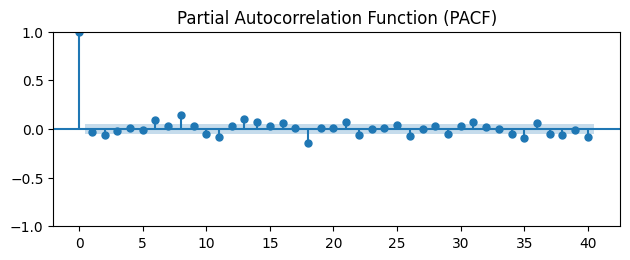

In [ ]:
plt.subplot(2, 1, 2)
plot_pacf(NVDA_dff, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [ ]:
train = int(np.ceil(len(NVDA)*0.80))
train

1007

In [ ]:
train_data = NVDA[ : int(np.ceil(len(NVDA)*0.80)) ]
train_data

,Date,Adj Close
0,17-07-2019,4.218399
1,18-07-2019,4.230082
2,19-07-2019,4.186831
3,22-07-2019,4.258418
4,23-07-2019,4.366294
...,...,...
1002,11-07-2023,42.392307
1003,12-07-2023,43.888859
1004,13-07-2023,45.963238
1005,14-07-2023,45.455391


In [ ]:
model = ARIMA(train_data['Adj Close'], order=(3, 2, 3))  # Replace (p, d, q) with appropriate values
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1007
Model:                 ARIMA(3, 2, 3)   Log Likelihood                -967.077
Date:                Wed, 17 Jul 2024   AIC                           1948.153
Time:                        18:19:01   BIC                           1982.542
Sample:                             0   HQIC                          1961.220
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7538      0.028    -62.383      0.000      -1.809      -1.699
ar.L2         -0.9918      0.049    -20.131      0.000      -1.088      -0.895
ar.L3         -0.0123      0.027     -0.454      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 15.558372485792464


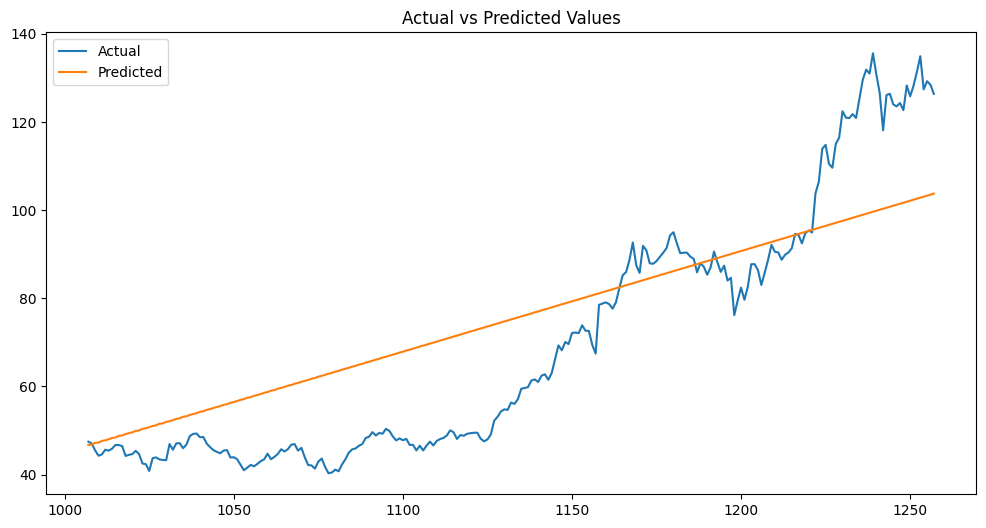

In [ ]:
# prompt: next step for arima model

# Make predictions
predictions = model_fit.predict(start=train, end=len(NVDA)-1)

# Evaluate the model
rmse = sqrt(mean_squared_error(NVDA['Adj Close'][train:], predictions))
print('RMSE:', rmse)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(NVDA['Adj Close'][train:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


RMSE: 15.558372485792464


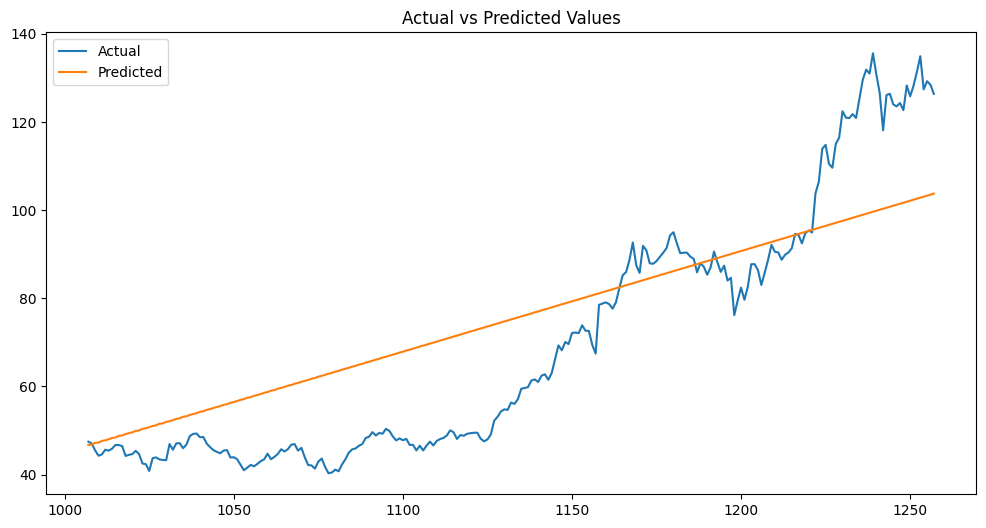

In [ ]:
# Make predictions
predictions = model_fit.predict(start=train, end=len(NVDA)-1)

# Evaluate the model
rmse = sqrt(mean_squared_error(NVDA['Adj Close'][train:], predictions))
print('RMSE:', rmse)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(NVDA['Adj Close'][train:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 15.558372485792464


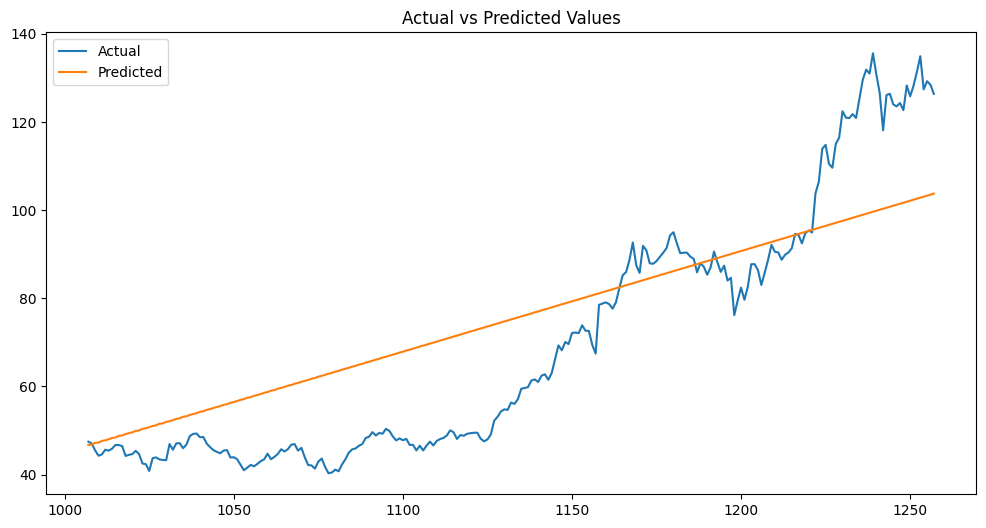

In [ ]:
# prompt: how to incress the rmse value

# Try different ARIMA orders
# Experiment with different values of p, d, and q in the ARIMA model.
# The optimal values depend on the specific time series data.
model = ARIMA(train_data['Adj Close'], order=(3, 2, 3))  # Example: Increase order
model_fit = model.fit()

# Feature Engineering
# Add relevant features that might improve the model's predictive power.
# For example, you could include technical indicators, economic data, or news sentiment.

# Consider Seasonality
# If your time series exhibits seasonality, incorporate it into the model.
# You can use seasonal ARIMA (SARIMA) models or add seasonal dummy variables.

# Hyperparameter Tuning
# Fine-tune the hyperparameters of the ARIMA model, such as the optimization method or the number of iterations.

# Ensemble Methods
# Combine predictions from multiple models (e.g., ARIMA, exponential smoothing, machine learning models) to potentially improve accuracy.

# Evaluate the model with the new configuration
predictions = model_fit.predict(start=train, end=len(NVDA)-1)
rmse = sqrt(mean_squared_error(NVDA['Adj Close'][train:], predictions))
print('RMSE:', rmse)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(NVDA['Adj Close'][train:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 15.558372485792464


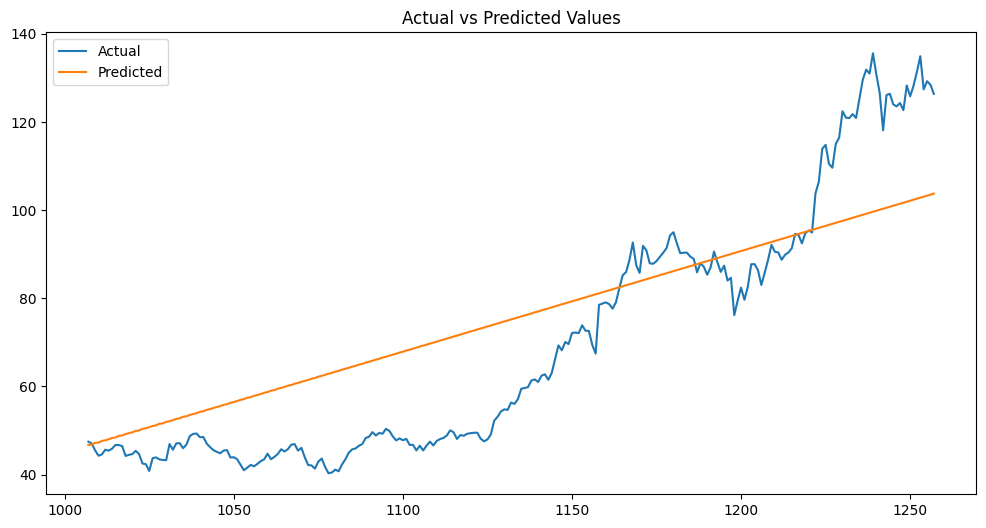

In [ ]:
# prompt: how to incress the rmse value

# Try different ARIMA orders
# Experiment with different values of p, d, and q in the ARIMA model.
# The optimal values depend on the specific time series data.
model = ARIMA(train_data['Adj Close'], order=(3, 2, 3))  # Example: Increase order
model_fit = model.fit()

# Feature Engineering
# Add relevant features that might improve the model's predictive power.
# For example, you could include technical indicators, economic data, or news sentiment.

# Consider Seasonality
# If your time series exhibits seasonality, incorporate it into the model.
# You can use seasonal ARIMA (SARIMA) models or add seasonal dummy variables.

# Hyperparameter Tuning
# Fine-tune the hyperparameters of the ARIMA model, such as the optimization method or the number of iterations.

# Ensemble Methods
# Combine predictions from multiple models (e.g., ARIMA, exponential smoothing, machine learning models) to potentially improve accuracy.

# Evaluate the model with the new configuration
predictions = model_fit.predict(start=train, end=len(NVDA)-1)
rmse = sqrt(mean_squared_error(NVDA['Adj Close'][train:], predictions))
print('RMSE:', rmse)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(NVDA['Adj Close'][train:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
order = (3, 2, 3)  # Replace with the order obtained from ACF and PACF analysis
model = ARIMA(NVDA_dff, order=order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

In [ ]:
forecast_5days = results.get_forecast(steps=5)
forecast_5days

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


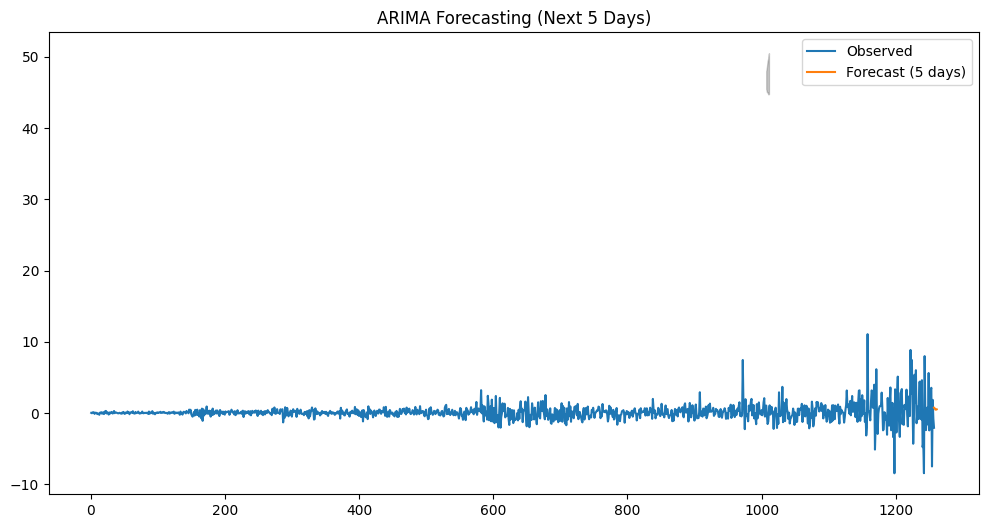

In [ ]:
# Plotting the forecast for the next 5 days
plt.figure(figsize=(12, 6))
plt.plot(NVDA_dff, label='Observed')
plt.plot(forecast_5days.predicted_mean, label='Forecast (5 days)')
plt.fill_between(conf_int_5days.index, conf_int_5days.iloc[:, 0], conf_int_5days.iloc[:, 1], color='k', alpha=0.2)
plt.title('ARIMA Forecasting (Next 5 Days)')
plt.legend()
plt.show()

In [ ]:
# Calculate performance metrics
mse_5days = mean_squared_error(NVDA_dff[-5:], forecast_5days.predicted_mean)
rmse_5days = sqrt(mse_5days)
print(f"\nMean Squared Error (5 days): {mse_5days}")
print(f"Root Mean Squared Error (5 days): {rmse_5days}")


Mean Squared Error (5 days): 16.928375856830574
Root Mean Squared Error (5 days): 4.114410754510367
